## Pacotes necessários

pickle <br>
sklearn <br>
yellowbrick <br>

In [40]:
import pickle

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix

## Carregar Dados Salvos - Base Crédito

X_treinamento, X_teste, Y_treinamento, Y_teste:

In [41]:
with open('content/credit.pkl', 'rb') as f:
    X_credit_train, X_credit_test, Y_credit_train, Y_credit_test = pickle.load(f)

X_credit_train.shape, X_credit_test.shape, Y_credit_train.shape, Y_credit_test.shape

((1500, 3), (500, 3), (1500,), (500,))

## Treinamento algoritmo Árvore de Decisão - Base Crédito

In [42]:
tree_credit_data = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_credit_data.fit(X_credit_train, Y_credit_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Previsões algoritmo Árvore de Decisão - Base Crédito

In [43]:
predict_credit = tree_credit_data.predict(X_credit_test)

## Estatísticas de acerto - Base Crédito - 98,20%

Acurácia:

0.982

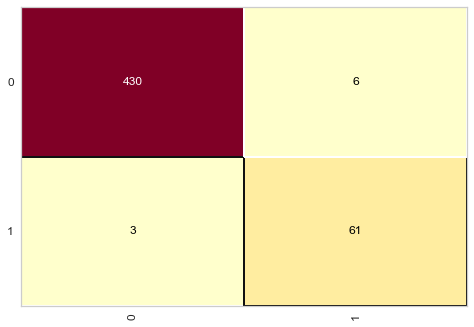

In [44]:
cm = ConfusionMatrix(tree_credit_data)
cm.fit(X_credit_train, Y_credit_train)
cm.score(X_credit_test, Y_credit_test)

Relatório de Classificação:

In [45]:
print(classification_report(Y_credit_test, predict_credit))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



## Carregar Dados Salvos - Base Census

X_treinamento, X_teste, Y_treinamento, Y_teste:

In [46]:
with open('content/census.pkl', 'rb') as f:
    X_census_train, X_census_test, Y_census_train, Y_census_test = pickle.load(f)

X_census_train.shape, X_census_test.shape, Y_census_train.shape, Y_census_test.shape

((27676, 108), (4885, 108), (27676,), (4885,))

## Treinamento algoritmo Árvore de Decisão - Base Census

In [47]:
tree_census_data = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_census_data.fit(X_census_train, Y_census_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Previsões algoritmo Árvore de Decisão - Base census

In [48]:
predict_census = tree_census_data.predict(X_census_test)

## Estatísticas de acerto - Base census - 81,04%

Acurácia:

0.8104401228249745

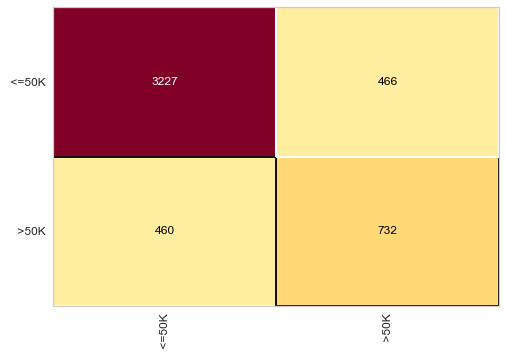

In [49]:
cm = ConfusionMatrix(tree_census_data)
cm.fit(X_census_train, Y_census_train)
cm.score(X_census_test, Y_census_test)

Relatório de Classificação:

In [50]:
print(classification_report(Y_census_test, predict_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



## Validação Cruzada e Grid Search:

Unindo as bases de treinamento e teste para utilizar o Cross Validation:

In [51]:
X_credit = np.concatenate((X_credit_train, X_credit_test), axis=0)
X_credit.shape

(2000, 3)

In [52]:
Y_credit = np.concatenate((Y_credit_train, Y_credit_test), axis=0)
Y_credit.shape

(2000,)

Definindo os parâmetros que serão testados:

In [53]:
param = {'criterion': ['gini', 'entropy'],
         'splitter': ['best', 'random'],
         'min_samples_split': [2, 5, 10, 20],
         'min_samples_leaf': [1, 5, 10, 20]}

Treinando os parâmetros:

In [54]:
param_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param)
param_search.fit(X_credit, Y_credit)
best_param = param_search.best_params_
best_score = param_search.best_score_

## Resultados - 98.3%:

Melhores parâmetros

In [55]:
print(best_param)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


Melhor acurácia:

In [56]:
print(best_score)

0.983
